In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_path = 'F:/EPITA - M.Sc CS/S2 - DSA/Data Science Projects/Customer Churn Analysis/Data/Customer Churn.csv'

In [4]:
df = pd.read_csv(df_path)

In [5]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)

In [8]:
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

In [12]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

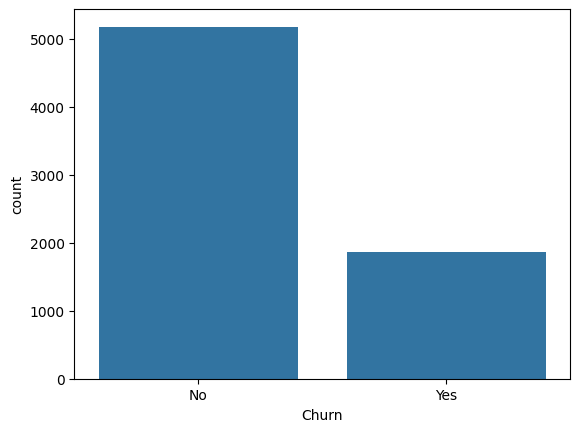

In [13]:
sns.countplot( x = 'Churn', data =df)
plt.show()

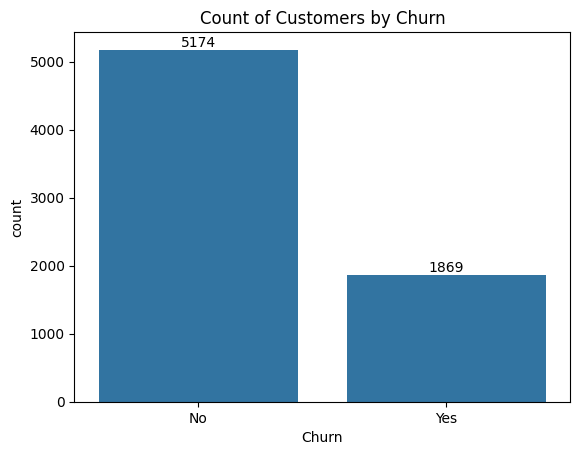

In [14]:
ax = sns.countplot( x = 'Churn', data =df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

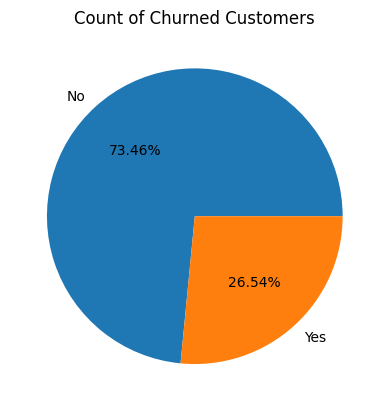

In [15]:
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Count of Churned Customers")
plt.show()

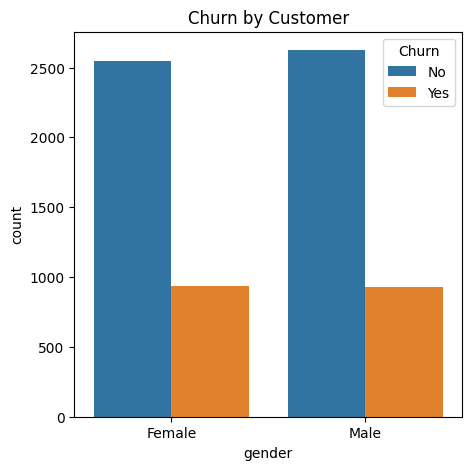

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'gender', data =df, hue = 'Churn')
plt.title("Churn by Customer")
plt.show()

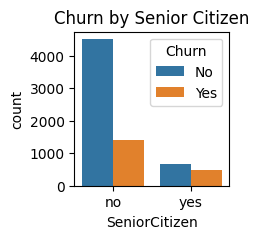

In [17]:
plt.figure(figsize = (2,2))
sns.countplot(x = 'SeniorCitizen', data =df, hue = 'Churn')
plt.title("Churn by Senior Citizen")
plt.show()

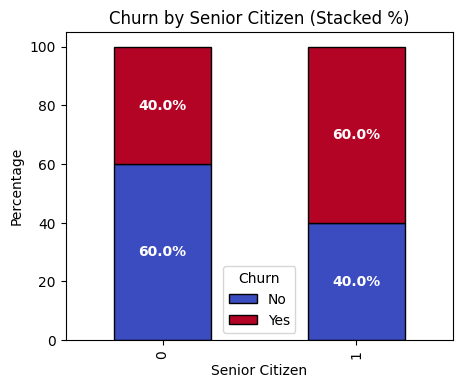

In [18]:
data = {'SeniorCitizen': [0, 0, 1, 1, 0, 1, 0, 1, 1, 0],
        'Churn': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes']}
df = pd.DataFrame(data)

crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

crosstab.plot(kind='bar', stacked=True, figsize=(5, 4), colormap="coolwarm", edgecolor="black")

for bar in plt.gca().containers:
    plt.gca().bar_label(bar, fmt='%.1f%%', label_type='center', fontsize=10, color='white', weight='bold')

plt.title("Churn by Senior Citizen (Stacked %)", fontsize=12)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn")
plt.show()

In [19]:
plt.figure(figsize = (9,4))
sns.histplot(x="tenure", data = df, bins = 72, hue = "Churn")
plt.show()

ValueError: Could not interpret value `tenure` for `x`. An entry with this name does not appear in `data`.

<Figure size 900x400 with 0 Axes>

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = 'Contract', data =df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by Contract")
plt.show()

In [20]:
df.columns.values

array(['SeniorCitizen', 'Churn'], dtype=object)

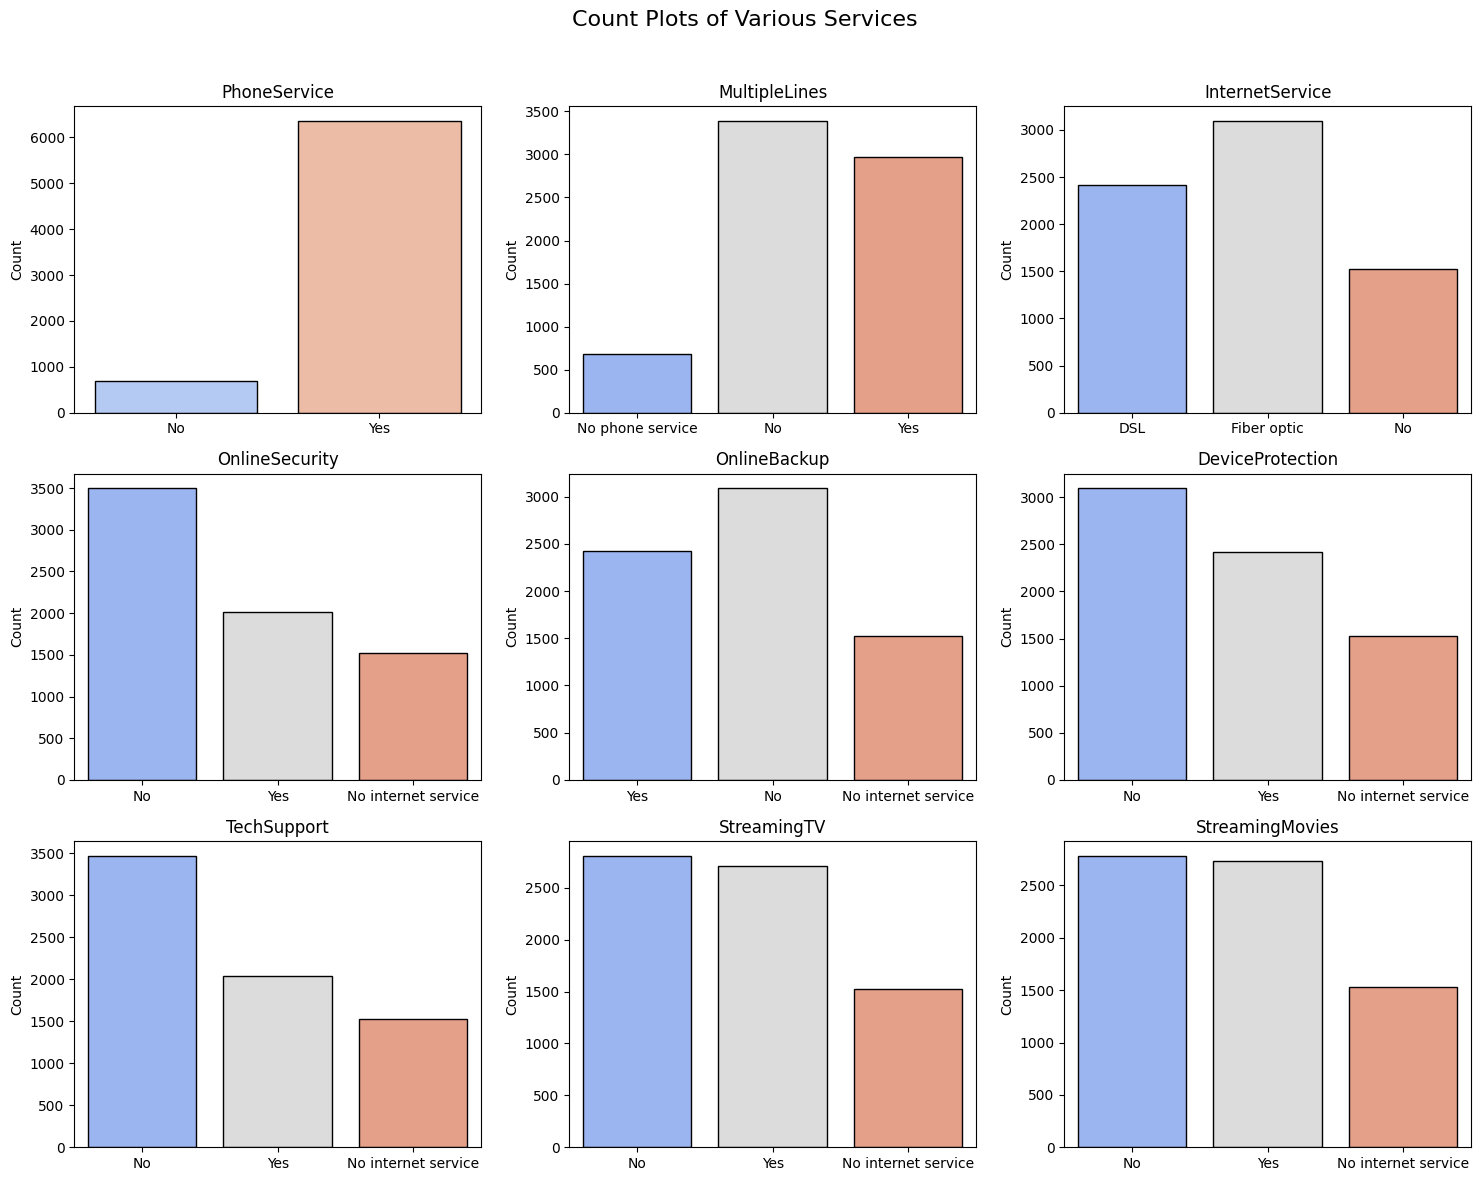

In [34]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

rows = 3
cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Count Plots of Various Services", fontsize=16)

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=df[col], hue=df[col], ax=axes[i], palette="coolwarm", legend=False, edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [35]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x = 'PaymentMethod', data =df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 10)
plt.title("Count of Customers by Payment Method")
plt.show()